# Importing Packages

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

In [4]:
data = pd.read_csv("UCI_Credit_Card.csv")
data.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Number of records

In [5]:
data.shape

(30000, 25)

In the data, there are 30000 records.

# Checking for numerical and categorical features

In [6]:
cat_column = data.loc[:,data.dtypes==np.object]
num_column = data.loc[:,data.dtypes!=np.object]

# Checking for missing value

In [7]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(5))
print(missing_data.shape)

                            Total  Percent
default.payment.next.month      0      0.0
PAY_6                           0      0.0
LIMIT_BAL                       0      0.0
SEX                             0      0.0
EDUCATION                       0      0.0
(25, 2)


In [8]:
missing_data.to_csv("missing_data.csv")

# Count plot for target variable

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


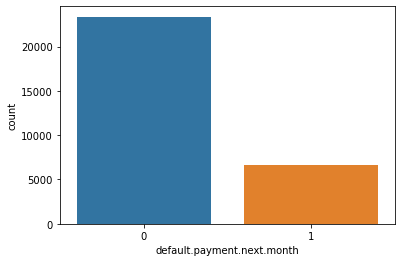

In [9]:
sns.countplot(data['default.payment.next.month']) 


In [10]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [11]:
data['EDUCATION'] = data['EDUCATION'].replace(6,5)

In [12]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      331
4      123
0       14
Name: EDUCATION, dtype: int64

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


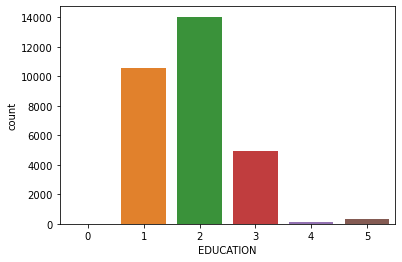

In [13]:
sns.countplot(data['EDUCATION']) 

In [14]:
X = data.drop('default.payment.next.month', axis = 1)
y = data['default.payment.next.month']

# Train Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=False)

# BaseLine Model

In [16]:
model  = LogisticRegression(random_state=42, n_jobs = -1)
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)
model_predictions_train = model.predict(X_train)
print('Accuracy: ', accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy:  0.789
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      4734
           1       0.00      0.00      0.00      1266

    accuracy                           0.79      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.62      0.79      0.70      6000



E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
model  =  DecisionTreeClassifier(random_state=40)
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)
model_predictions_train = model.predict(X_train)
print('Accuracy: ', accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy:  0.6655
              precision    recall  f1-score   support

           0       0.84      0.71      0.77      4734
           1       0.31      0.49      0.38      1266

    accuracy                           0.67      6000
   macro avg       0.58      0.60      0.58      6000
weighted avg       0.73      0.67      0.69      6000



In [19]:
model  = RandomForestClassifier(random_state=42, n_jobs = -1)
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy:  0.8295
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4734
           1       0.66      0.39      0.49      1266

    accuracy                           0.83      6000
   macro avg       0.76      0.67      0.69      6000
weighted avg       0.81      0.83      0.81      6000



# Handling Imbalanced data by SMOTE

In [22]:
oversampler = SMOTE(random_state = 0)
smote_train, smote_target = oversampler.fit_resample(X_train, y_train)

In [26]:
model  = LogisticRegression(random_state=42, n_jobs = -1)
model.fit(smote_train, smote_target)
model_predictions = model.predict(X_test)
# model_predictions_train = model.predict(smote_train)
print('Accuracy: ', accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy:  0.43916666666666665
              precision    recall  f1-score   support

           0       0.90      0.32      0.48      4734
           1       0.26      0.87      0.40      1266

    accuracy                           0.44      6000
   macro avg       0.58      0.60      0.44      6000
weighted avg       0.77      0.44      0.46      6000



In [27]:
model  =  DecisionTreeClassifier(random_state=40)
model.fit(smote_train, smote_target)
model_predictions = model.predict(X_test)
# model_predictions_train = model.predict(X_train)
print('Accuracy: ', accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy:  0.67
              precision    recall  f1-score   support

           0       0.83      0.73      0.78      4734
           1       0.31      0.45      0.37      1266

    accuracy                           0.67      6000
   macro avg       0.57      0.59      0.57      6000
weighted avg       0.72      0.67      0.69      6000



In [25]:
model  = RandomForestClassifier(random_state=42, n_jobs = -1)
model.fit(smote_train, smote_target)
model_predictions = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy:  0.7991666666666667
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      4734
           1       0.53      0.47      0.50      1266

    accuracy                           0.80      6000
   macro avg       0.69      0.68      0.69      6000
weighted avg       0.79      0.80      0.79      6000

